Matriz A =  [[16 -4 12 -4]
 [-4  2 -1  1]
 [12 -1 14 -2]
 [-4  1 -2 83]]
Matriz L =  [[ 4.  0.  0.  0.]
 [-1.  1.  0.  0.]
 [ 3.  2.  1.  0.]
 [-1.  0.  1.  9.]]
Matriz L^T =  [[ 4. -1.  3. -1.]
 [ 0.  1.  2.  0.]
 [ 0.  0.  1.  1.]
 [ 0.  0.  0.  9.]]
Matriz LL^T =  [[ 16.  -4.  12.  -4.]
 [ -4.   2.  -1.   1.]
 [ 12.  -1.  14.  -2.]
 [ -4.   1.  -2.  83.]]
Norma || A - LL^T || =  0.0


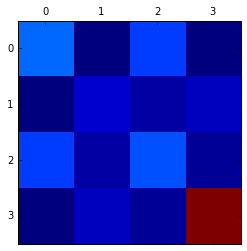

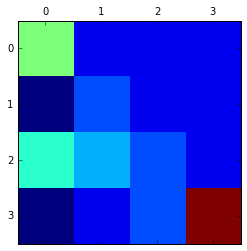

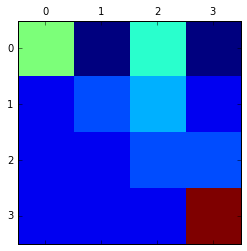

In [16]:
%matplotlib inline

"""choleskyU.

Implementacao da fatoracao de Cholesky.

"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import array, linalg, dot

# matriz
A = array([[16, -4, 12, -4],
           [-4, 2, -1, 1],
           [12, -1, 14, -2],
           [-4, 1, -2, 83]])

# fator de Cholesky do Scipy
L = linalg.cholesky(A, lower=True, overwrite_a=False, check_finite=True)

# fator de Cholesky implementado
n = A.shape[0]
G = np.zeros(A.shape, dtype=float)

for k in range(0, n):
    s = 0.0
    for j in range(0, k-1):
        s += G[k, j]**2
    r = A[k, k] - s
    G[k, k] = np.sqrt(r)
    for i in range(k+1, n):
        s = 0.0
        for j in range(1, k-1):
            s += G[i, j]*G[k, j]
        G[i, k] = (A[i, k] - s)/G[k, k]

print 'Matriz A = ', A
print 'Matriz L = ', L
print 'Matriz L^T = ', L.T

# prova real por produto interno
A2 = dot(L, L.T)
print 'Matriz LL^T = ', A2

# prova real usando norma de Frobenius da diferenca de matrizes
print 'Norma || A - LL^T || = ', linalg.norm(A-A2)

plt.matshow(A)
plt.matshow(L)
plt.matshow(L.T)